In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test_x.csv')

In [4]:
train_df.head(15)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459
5,5,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,332489.316371,Büyük Şehir,Giyim,9218.994557,56.626868,Etmiyor,obek_8,216.332207
6,6,Kadın,18-30,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,256538.898810,Kırsal,Ev ve Mobilya,6013.405491,15.929857,Etmiyor,obek_3,19.248434
7,7,Kadın,31-40,Bekar,Lise Mezunu,Kendi İşinin Sahibi,213630.355636,Küçük Şehir,Ev ve Mobilya,3960.361517,8.913887,Etmiyor,obek_5,102.394323
8,8,Erkek,51-60,Bekar,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,479593.473447,Köy veya Kasaba,Elektronik ve Teknolojik Ürünler,39574.601258,25.685715,Etmiyor,obek_3,56.322893
9,9,Kadın,51-60,Evli,Üniversite Mezunu,Emekli,477359.775587,Küçük Şehir,Giyim,41555.832293,27.871027,Etmiyor,obek_6,44.838758


In [5]:
test_df.head(15)

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491
5,5,Kadın,18-30,Bekar,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,181609.929894,Büyük Şehir,Giyim,4030.203747,28.811244,Etmiyor,59.615934
6,6,Erkek,51-60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,276886.697016,Küçük Şehir,Kozmetik,5311.590423,5.967002,Etmiyor,10.301621
7,7,Erkek,18-30,Evli,Üniversite Mezunu,İşsiz veya Düzenli Bir İşi Yok,228428.173077,Küçük Şehir,Giyim,9900.234299,47.742024,Ediyor,113.574470
8,8,Kadın,18-30,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,342851.316827,Büyük Şehir,Giyim,23998.258647,21.540486,Etmiyor,102.277950
9,9,Erkek,18-30,Bekar,Üniversite Mezunu,Düzenli ve Ücretli Bir İşi Var,276358.769901,Büyük Şehir,Kozmetik,9106.272062,48.354515,Ediyor,189.459429


In [6]:
missing_values = train_df.isnull().sum()

In [7]:
target_distribution = train_df['Öbek İsmi'].value_counts()

In [8]:
print(missing_values)
print("*"*50)
print(target_distribution)

index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64
**************************************************
Öbek İsmi
obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: count, dtype: int64


In [9]:
submission_ids = test_df['index']

In [10]:
train_df.drop(columns=['index'], inplace=True)
test_df.drop(columns=['index'], inplace=True)

In [11]:
# X = train_df.drop('Öbek İsmi', axis=1)

In [12]:
categorical_features = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
                        'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']

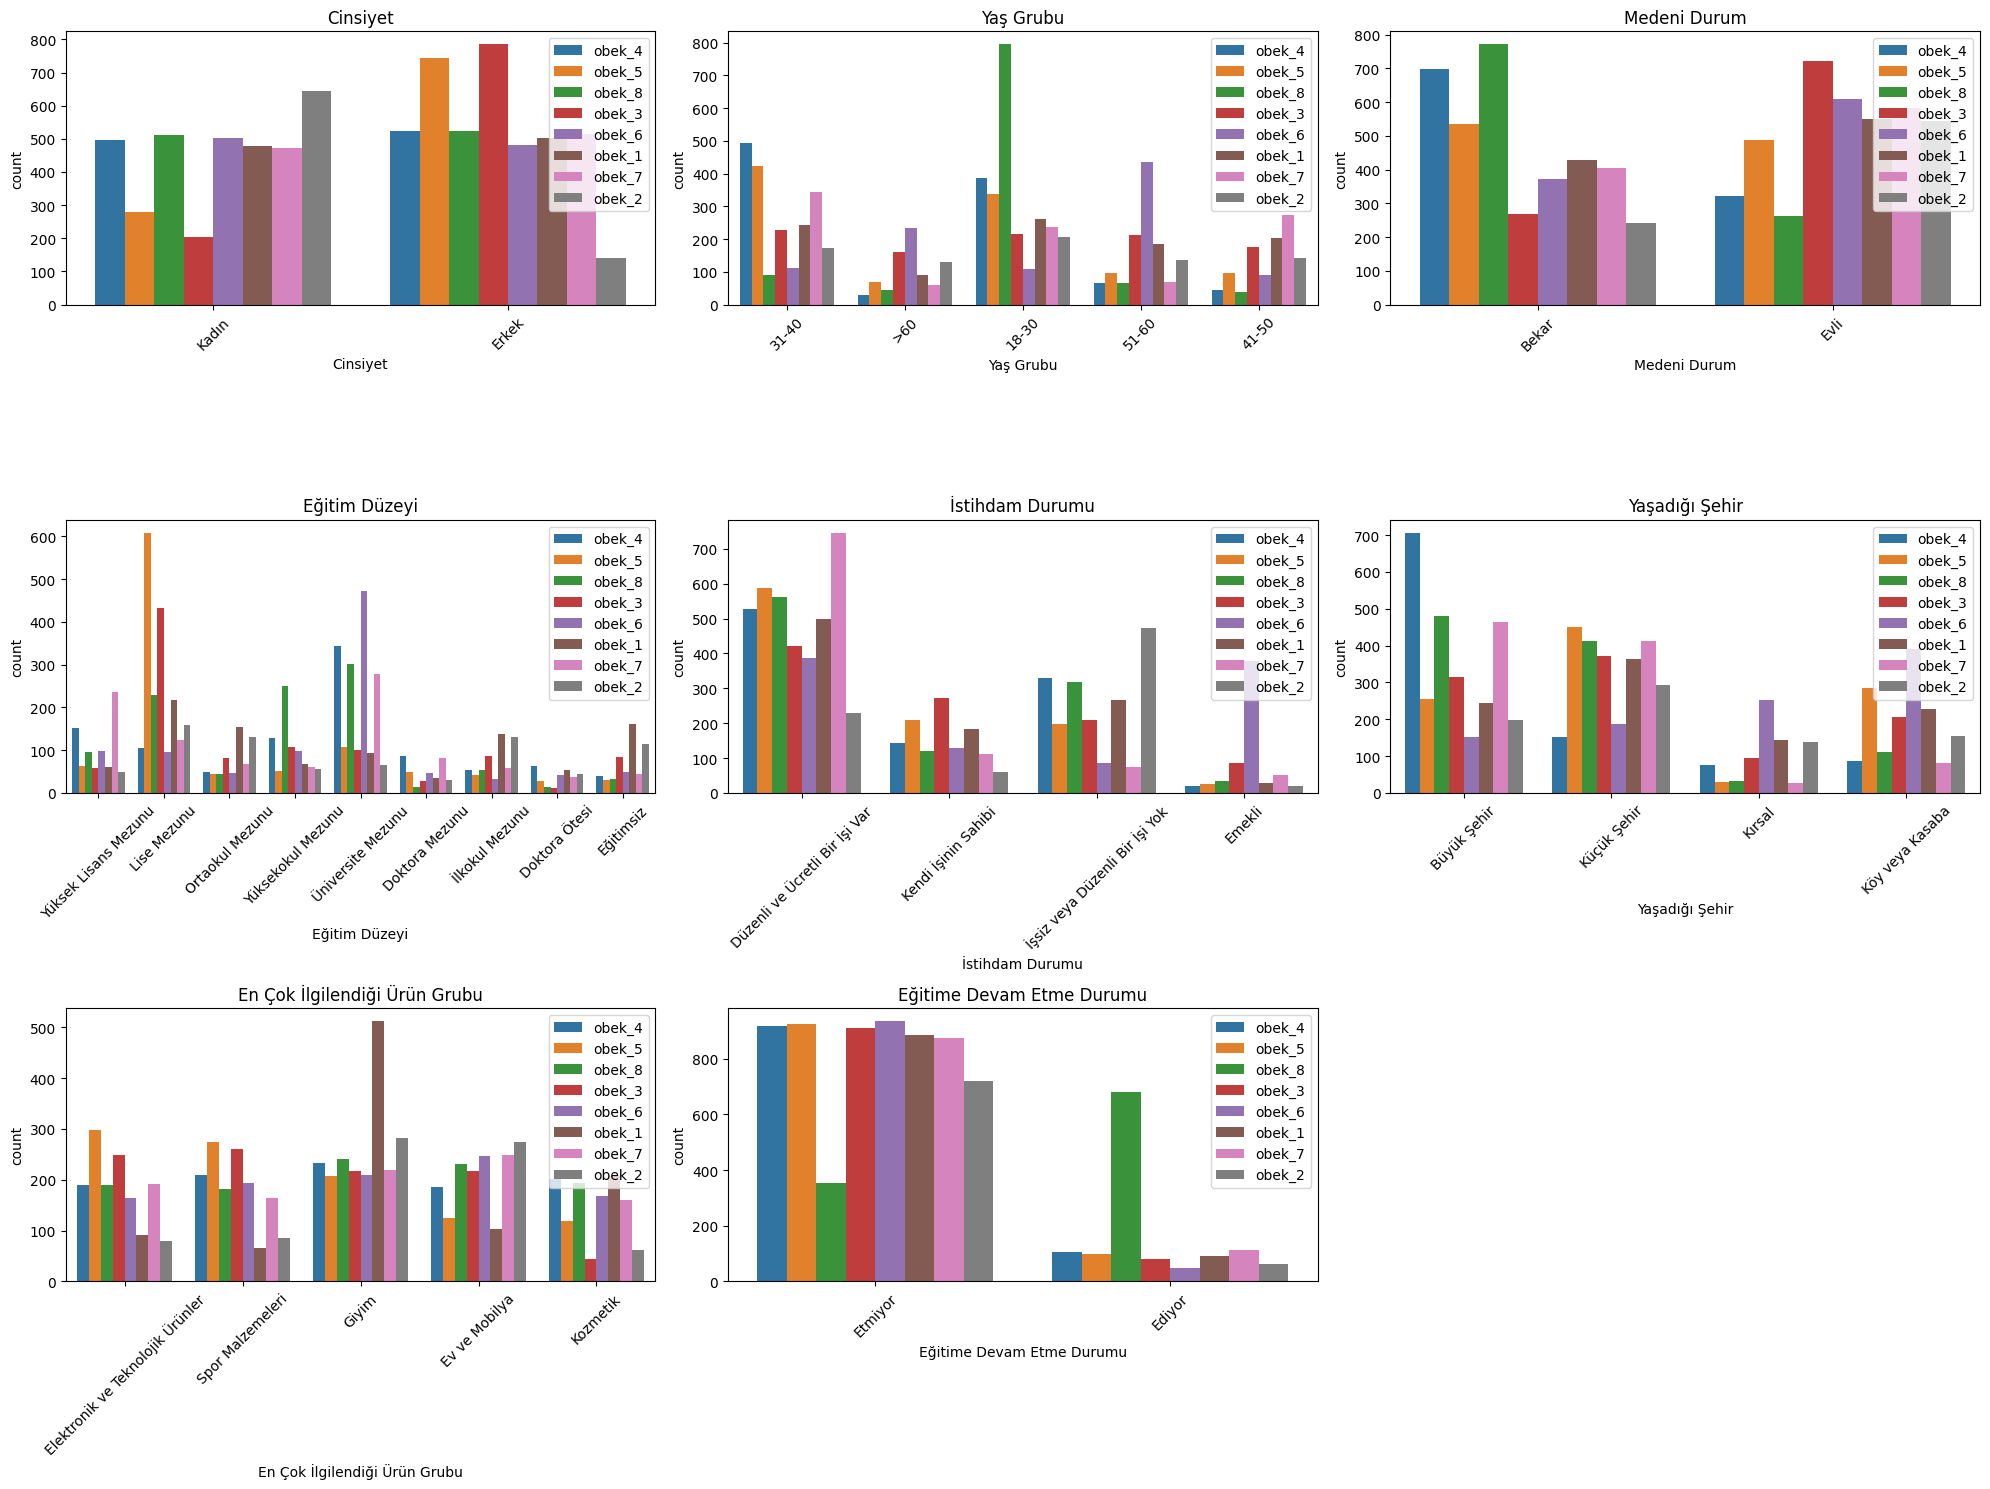

In [13]:
not_concat = train_df.drop('Öbek İsmi', axis=1)
X = pd.concat([not_concat, test_df], axis=0)
y = train_df['Öbek İsmi']


visual_data_original = pd.concat([X, y], axis=1)
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(categorical_features, start=1):
    plt.subplot(3, 3, idx)
    sns.countplot(data=visual_data_original, x=feature, hue='Öbek İsmi')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [14]:
"""
    Cinsiyet: Bazı öbeklerde cinsiyet farklılığı görünüyor. Örneğin öbek 2'de kadın oranı fazlayken, öbek 5 ve öbek 3'de erkek oranı fazla.
    Yaş Grubu: öbek 1, öbek 2, öbek 3'de yaş aralığı eşit oranda dağılmış gibi görünüyor.
    Öbek 4 ve öbek 5'de 18-40 yaş arası çoğunlukta. Öbek 6'da 51-60 ve 60 üstü yaş aralığı çoğunlukta görünüyor. öbek 7'de 31-50 yaş aralığı fazla görünüyor ve arkasından 18-30 yaş aralığı geliyor.
    Öbek 8'de 18-30 yaş aralığı ezici çoğunlukta.
    Medeni Durum: öbek 4 ve öbek 8'de bekarlar fazla iken, öbek 3, öbek 6, öbek 1 öbek 7 ve öbek 2'de evliler fazla görünüyor. öbek 5'de eşite yakın bir dağılım var.
    Eğitim Düzeyi: öbek 1 ve öbek 2'de eğitimsiz, ilkokul, ortaokul ve lise mezunları fazlalıkta. öbek 3'de, öbek 5'de ve öbek 8'de lise mezunları fazlalıkta. öbek 4'de ve öbek 6'da üniversite mezunları fazlalıkta. öbek 7'de üniversite ve yüksek lisans mezunları fazlalıkta.
    İstihdam Durumu: Emekliler öbek 6'da çoğunlukta. öbek 7 ve öbek 6'da işsiz veya düzenli işi olmayanlar azınlıkta. düzenli ve ücretli bir işi olanlar öbek 2'de azınlıkta, diğer öbeklerde orantılı bir dağılım var.
    Yaşadığı Şehir: Büyük şehirde yaşayanların çoğunluğu öbek 4'de. öbek 6'nın çoğunluğu kırsal, köy veya kasabada yaşıyor.
    Eğitime Devam: Öbek 8 eğitime devam ediyor.

    Öbek 1: Eşit cinsiyet, eşit yaş ama 60 yaş üstü azınlıkta, evliler fazla, eğitimsiz, ilkokul, ortaokul, lise mezunları, emekli ve kendi işinin sahibi olanlar az, yaşadıkları şehirler eşit sayılır, eğitime devam etmiyorlar, en çok giyim ile ilgileniyorlar. (memur ve işçi kesimi)
    Öbek 2: Kadın fazlalıkta, yaş dağılımı eşit, evliler fazla, eğitimsiz, ilkokul, ortaokul ve lise mezunları fazla, işsizler, yaşadıkları şehirler eşit dağılım, eğitime devam yok, giyim ev ve mobilya en çok alınanlar (ev hanımları)
    Öbek 3: Erkek, yaş aralığı eşit, evli, lise mezunu, düzenli işi var veya kendi işinin sahibi, küçük şehir biraz çoğunlukta, eğitime devam etmiyor, kozmetik almıyor (erkekler)
    Öbek 4: Eşit cinsiyet, 18-40 yaş aralığı, bekar, üniversite mezunu, düzenli ve ücretli bir işi var ve işsizler çoğunlukta, büyük şehirde yaşıyorlar, ilgilenilen ürünler eşit, eğitime devam etmiyor (mezun çalışan)
    Öbek 5: Erkek, 18-40 yaş aralığı, medeni durum eşit gibi, lise mezunu, düzenli ve ücretli işleri var, küçük şehir ya da köy veya kasabada yaşıyorlar, eğitime devam etmiyorlar, elektronik ve teknolojik ve spor malzemeleri alıyorlar (öbek 3 ile aynı gibi)
    Öbek 6: Eşit cinsiyet, 51-60 ve 60 yaş üstü, evlilik çoğunlukta, üniversite mezunları, emekli ya da düzenli ve ücretli işleri var, kırsal, köy veya kasabada yaşıyorlar, her ürünle eşit ilgeniyorlar, eğitime devam yok (emekliler)
    Öbek 7: Eşit cinsiyet, 31-50 yaş aralığı fazla, evliler, üniversite ve yüksek lisans mezunları, düzenli işleri var, büyük ve küçük şehirlerde yaşıyorlar, ev ve mobilya ilgileniyorlar, eğitime devam etmiyorlar (beyaz yaka)
    Öbek 8: Eşit cinsiyet, 18-30 yaş, bekar, lise, yüksekokul, üniversite mezunları, düzenli ve ücretli işleri var, büyük ve küçük şehirlerde yaşıyorlar, ilgilendikleri ürünler orantılı, eğitime devam ediyorlar
"""

"\n    Cinsiyet: Bazı öbeklerde cinsiyet farklılığı görünüyor. Örneğin öbek 2'de kadın oranı fazlayken, öbek 5 ve öbek 3'de erkek oranı fazla.\n    Yaş Grubu: öbek 1, öbek 2, öbek 3'de yaş aralığı eşit oranda dağılmış gibi görünüyor.\n    Öbek 4 ve öbek 5'de 18-40 yaş arası çoğunlukta. Öbek 6'da 51-60 ve 60 üstü yaş aralığı çoğunlukta görünüyor. öbek 7'de 31-50 yaş aralığı fazla görünüyor ve arkasından 18-30 yaş aralığı geliyor.\n    Öbek 8'de 18-30 yaş aralığı ezici çoğunlukta.\n    Medeni Durum: öbek 4 ve öbek 8'de bekarlar fazla iken, öbek 3, öbek 6, öbek 1 öbek 7 ve öbek 2'de evliler fazla görünüyor. öbek 5'de eşite yakın bir dağılım var.\n    Eğitim Düzeyi: öbek 1 ve öbek 2'de eğitimsiz, ilkokul, ortaokul ve lise mezunları fazlalıkta. öbek 3'de, öbek 5'de ve öbek 8'de lise mezunları fazlalıkta. öbek 4'de ve öbek 6'da üniversite mezunları fazlalıkta. öbek 7'de üniversite ve yüksek lisans mezunları fazlalıkta.\n    İstihdam Durumu: Emekliler öbek 6'da çoğunlukta. öbek 7 ve öbek 6'da

In [15]:
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    label_encoders[column] = le

train_df

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,5,0,748266.440879,0,0,32010.900881,37.310644,1,obek_4,102.936904
1,0,4,1,3,2,246298.609605,2,4,4145.729891,11.554851,1,obek_5,82.176053
2,0,0,0,3,0,268582.732360,2,2,9924.379414,55.353236,0,obek_8,141.661426
3,0,3,1,3,2,327721.837865,3,2,6417.780714,15.417239,1,obek_3,17.097397
4,0,1,1,4,3,397431.626948,0,2,7886.663061,14.689837,1,obek_3,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,1,4,0,7,1,478054.247819,1,3,43182.299801,31.356284,1,obek_6,51.600436
5456,0,3,1,1,2,481852.853651,1,1,42107.996193,26.288620,1,obek_6,49.190536
5457,1,3,1,8,0,309443.687351,2,1,4655.392445,5.156906,1,obek_1,9.537384
5458,1,0,0,6,0,266604.268016,0,1,9016.165906,39.205399,0,obek_8,143.281718


In [16]:
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    test_df[column] = le.fit_transform(test_df[column])
    label_encoders[column] = le

test_df

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,3,1,5,0,365331.930346,1,2,5566.587664,15.442635,1,19.646460
1,0,2,0,3,3,414899.236174,0,4,6756.766203,14.957246,1,19.675863
2,1,4,1,2,3,152825.872271,2,2,4493.915682,10.907930,1,46.904518
3,1,3,1,1,0,489052.908472,1,3,42670.646595,32.333021,1,48.083609
4,0,0,1,5,2,323635.711534,2,2,5959.266948,4.519968,1,12.752491
...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,0,0,6,2,259190.078834,2,1,9559.156534,41.883661,0,117.627785
2336,1,1,1,3,3,194580.563177,3,1,4070.232154,20.082996,1,45.659622
2337,0,4,1,5,0,357730.521969,0,1,22589.204381,18.922305,1,100.691379
2338,0,0,1,1,0,213179.637202,2,4,4205.390562,10.758108,1,97.778913


In [17]:
target_encoder = LabelEncoder()
train_df['Öbek İsmi'] = target_encoder.fit_transform(train_df['Öbek İsmi'])

train_df

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,5,0,748266.440879,0,0,32010.900881,37.310644,1,3,102.936904
1,0,4,1,3,2,246298.609605,2,4,4145.729891,11.554851,1,4,82.176053
2,0,0,0,3,0,268582.732360,2,2,9924.379414,55.353236,0,7,141.661426
3,0,3,1,3,2,327721.837865,3,2,6417.780714,15.417239,1,2,17.097397
4,0,1,1,4,3,397431.626948,0,2,7886.663061,14.689837,1,2,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,1,4,0,7,1,478054.247819,1,3,43182.299801,31.356284,1,5,51.600436
5456,0,3,1,1,2,481852.853651,1,1,42107.996193,26.288620,1,5,49.190536
5457,1,3,1,8,0,309443.687351,2,1,4655.392445,5.156906,1,0,9.537384
5458,1,0,0,6,0,266604.268016,0,1,9016.165906,39.205399,0,7,143.281718


In [18]:
not_concat = train_df.drop('Öbek İsmi', axis=1)
X = pd.concat([not_concat, test_df], axis=0)
X

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,5,0,748266.440879,0,0,32010.900881,37.310644,1,102.936904
1,0,4,1,3,2,246298.609605,2,4,4145.729891,11.554851,1,82.176053
2,0,0,0,3,0,268582.732360,2,2,9924.379414,55.353236,0,141.661426
3,0,3,1,3,2,327721.837865,3,2,6417.780714,15.417239,1,17.097397
4,0,1,1,4,3,397431.626948,0,2,7886.663061,14.689837,1,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,0,0,6,2,259190.078834,2,1,9559.156534,41.883661,0,117.627785
2336,1,1,1,3,3,194580.563177,3,1,4070.232154,20.082996,1,45.659622
2337,0,4,1,5,0,357730.521969,0,1,22589.204381,18.922305,1,100.691379
2338,0,0,1,1,0,213179.637202,2,4,4205.390562,10.758108,1,97.778913


In [19]:
y = train_df['Öbek İsmi']

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

not_concat = train_df.drop('Öbek İsmi', axis=1)
X = pd.concat([not_concat, test_df], axis=0)

# X = train_df.drop('Öbek İsmi', axis=1)
y = train_df['Öbek İsmi']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

ValueError: Found input variables with inconsistent numbers of samples: [7800, 5460]

In [ ]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = train_df.drop(columns=["Öbek İsmi"])
y = train_df["Öbek İsmi"]
clf = RandomForestClassifier(random_state=40, n_estimators=5, max_depth=8)
clf.fit(X, y)
clf.predict(test_df)"""

array([2, 2, 1, ..., 6, 4, 5])

In [ ]:
X.shape

(2340, 12)

In [ ]:
"""y_pred = clf.predict(test_df)

# Calculate the accuracy
accuracy = accuracy_score(train_df, y_pred)
classification_rep = classification_report(
train_df, y_pred, target_names=target_encoder.classes_)

print(f"Accuracy Score = {accuracy}")
print(classification_rep)"""

ValueError: Found input variables with inconsistent numbers of samples: [5460, 2340]

In [ ]:
test_data_scaled = scaler.transform(test_df)

In [ ]:
numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı',
                      'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

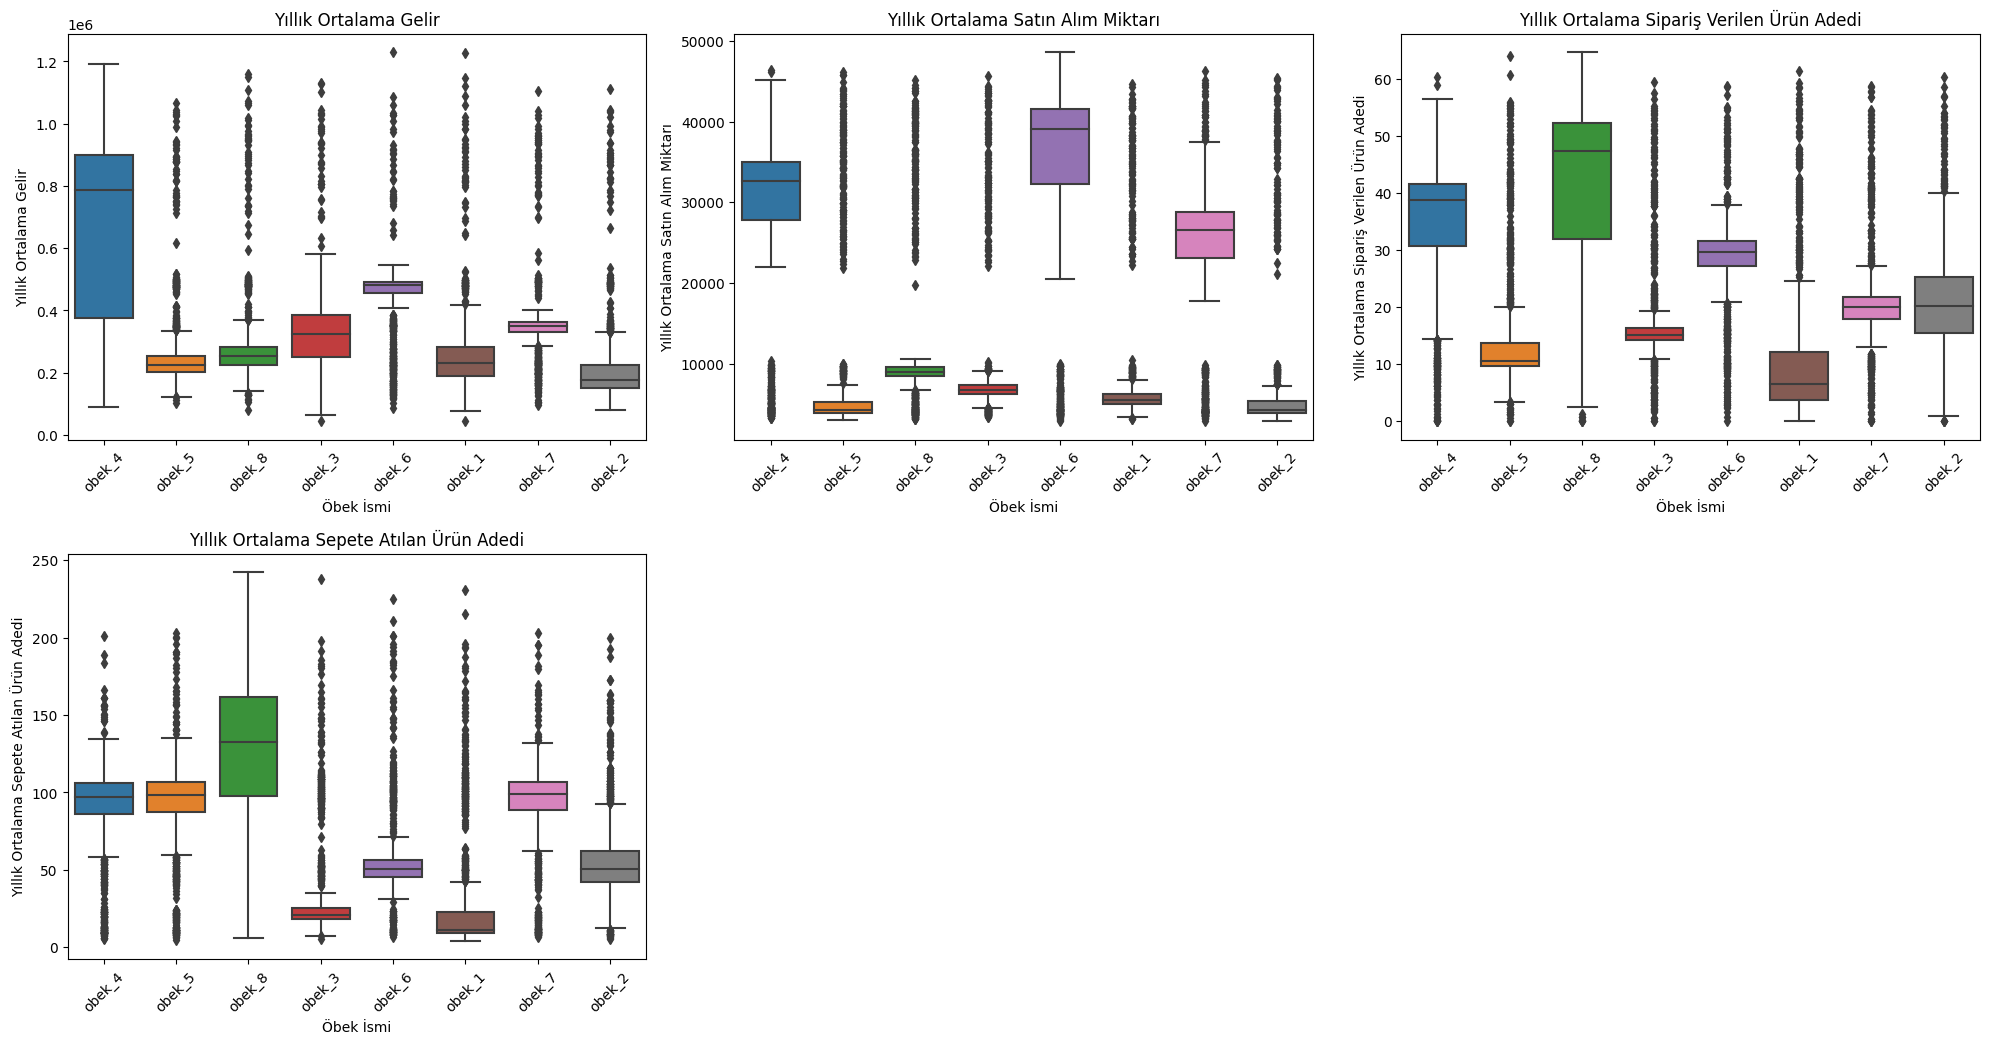

In [ ]:
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(data=visual_data_original, x='Öbek İsmi', y=feature)
    plt.title(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

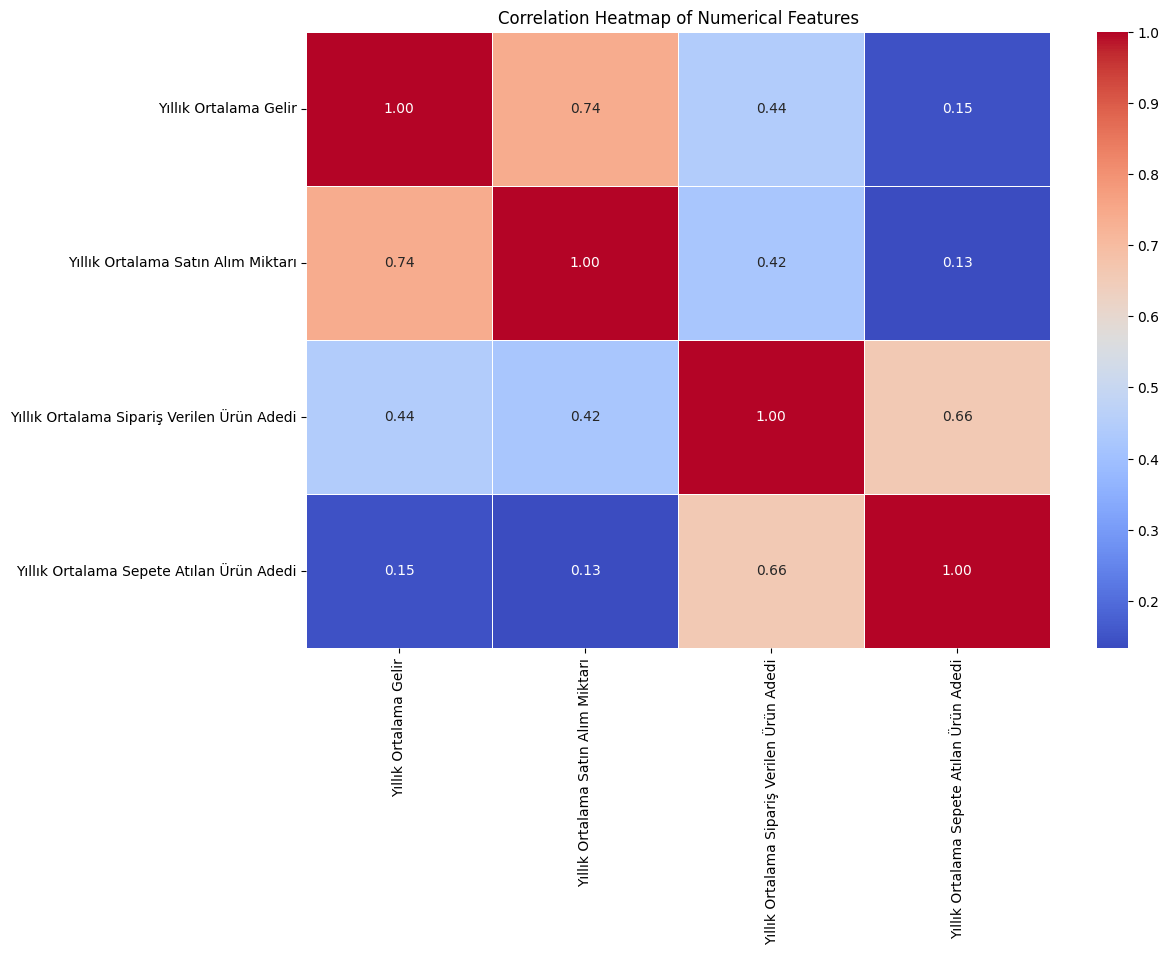

In [ ]:
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,1,1,0,5,0,748266.440879,0,0,32010.900881,37.310644,1,3,102.936904
1,0,4,1,3,2,246298.609605,2,4,4145.729891,11.554851,1,4,82.176053
2,0,0,0,3,0,268582.732360,2,2,9924.379414,55.353236,0,7,141.661426
3,0,3,1,3,2,327721.837865,3,2,6417.780714,15.417239,1,2,17.097397
4,0,1,1,4,3,397431.626948,0,2,7886.663061,14.689837,1,2,20.470459


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForest Classifier
clf = RandomForestClassifier(random_state=40, n_estimators=500, max_depth=8)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(
    y_test, y_pred, target_names=target_encoder.classes_)

print(f"Accuracy Score = {accuracy}")
print(classification_rep)

TypeError: object of type 'numpy.int64' has no len()

In [ ]:
print(y_pred)

[1 0 0 6 7 4 1 0 2 4 0 2 1 0 1 3 6 6 6 7 3 3 5 2 3 2 7 0 6 2 7 3 1 0 2 3 2
 6 5 1 6 4 2 6 4 6 5 4 7 2 4 7 1 2 2 0 3 2 5 2 7 5 5 2 1 7 2 4 6 2 2 0 5 7
 4 3 5 3 4 1 7 6 4 1 1 3 3 3 3 5 5 0 4 0 7 1 7 0 6 7 5 4 5 1 2 1 3 7 2 5 2
 6 1 1 0 5 3 3 5 7 7 5 4 5 0 1 2 0 7 6 2 4 4 1 2 5 7 2 0 4 2 4 0 2 3 2 5 1
 6 6 1 1 1 0 2 2 4 0 0 4 7 5 2 0 4 2 6 6 4 1 2 7 1 4 5 5 6 6 6 0 2 3 1 4 2
 3 5 4 6 3 0 2 4 3 4 6 2 2 4 7 3 1 2 6 4 0 4 7 2 4 4 5 0 6 3 6 7 4 4 7 3 7
 0 5 4 2 2 0 7 2 6 3 5 5 6 2 0 6 3 7 4 3 7 5 4 2 1 6 4 2 1 0 2 2 5 0 5 7 1
 6 1 2 5 1 3 0 0 2 4 6 7 2 2 4 2 4 2 6 6 4 1 5 3 3 6 5 4 1 7 3 6 5 5 2 5 2
 7 7 7 0 0 1 4 0 3 3 3 2 7 1 4 2 7 1 7 2 1 7 1 6 5 1 0 4 1 6 0 2 1 3 6 7 6
 6 1 2 1 7 5 0 6 1 5 5 2 0 0 0 4 5 6 5 6 1 1 6 6 0 0 6 2 0 6 0 3 6 4 4 7 2
 3 0 4 0 5 2 5 3 6 5 7 1 2 6 7 5 0 0 5 4 5 4 7 4 2 2 5 7 4 1 2 5 7 1 5 3 0
 3 3 6 3 6 4 2 5 0 6 1 6 2 7 0 5 5 2 5 3 2 6 7 6 5 5 5 0 6 1 1 2 4 7 5 4 3
 1 6 0 3 0 6 3 3 3 1 1 7 6 1 5 4 6 1 6 4 3 2 0 6 7 6 0 2 7 4 1 4 0 2 7 2 6
 4 0 3 6 5 2 2 3 1 4 6 7 

In [ ]:
test_predictions = clf.predict(test_data_scaled)
test_predictions_labels = target_encoder.inverse_transform(test_predictions)

In [ ]:
print(test_predictions)

[2 2 1 ... 6 4 5]


In [ ]:
submission_df = pd.DataFrame(
    {'id': submission_ids, 'Öbek İsmi': test_predictions_labels})
submission_df.to_csv('submission.csv', index=False)